In [1]:
import sys
import os
from  torch.utils.data import DataLoader
import datetime
sys.path.append('/home/falcon/Desktop/T2P/src/utils')

from utils.plotting_utils import Plot
from utils.plotting_utils import plot_line
from utils.color import ColorPalette
from module.model import T2P
from utils.data import TimeSeriesDataset
from train import train

# T2P

T2P (time-to-pattern) is an interpretable neural network designed to identify informative patterns in time series data. 

This neural network requires several training parameters to be specified, including the window size, which determines the length of the patterns to be learned from a continuous time series data, if they are not already in a specific size. 

The n_patterns parameter specifies the number of patterns the user would like to identify in the data.

T2P also includes several hyperparameters that need to be specified for training: lambda_1, which should be chosen between 0.6-0.9, and lambda_2, which should be chosen between 0.2-0.5.

The location of BinConcrete distribution, referred to as "a", should be set between 0.6-0.8.

Additionally, a learning rate should be specified, ideally between 1e-4 and 1e-3. 

The device parameter specifies the model's training device, which can be set to "cuda" or "cpu". 

Finally, the number of epochs the model needs to learn the pattern should also be specified.

For more detailed information on the T2P neural network and its parameters, please refer to the associated paper

In [2]:
# parameters
window_size = 100
n_patterns = 4
lambda_1 = 0.83
lambda_2 = 0.21
a = 0.8
learning_rate = 1e-3
device = 'cpu'
epochs = 1000

# data file path
data_name='synthetic_10_noise.txt'
file_path = os.getcwd() + f'/data/{data_name}'

# directory to save the result if None the result would not be saved and only depict in the notebook
runId = datetime.datetime.now().isoformat().replace(':', '_')
dn = data_name.split('.')[0]
save_dir = f'{os.getcwd()}/experiments/{dn}/{runId}/'
if save_dir is not None and not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
t2p = T2P(timesteps=window_size, n_patterns=n_patterns, lambda_1=lambda_1, device=device)

In [4]:
dataset = TimeSeriesDataset(file_path, window_size, device)

In [5]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [6]:
loss, sparsity = train(
                        epochs,
                        t2p,
                        dataloader,
                        learning_rate,
                        a,
                        lambda_1,
                        lambda_2,
                        device
                     )

##########Start trining##########
Epoch: 000000 | ELBO: 1.439 | Sparsity: 0.012
Epoch: 000001 | ELBO: 1.412 | Sparsity: 0.010
Epoch: 000002 | ELBO: 1.408 | Sparsity: 0.011
Epoch: 000003 | ELBO: 1.393 | Sparsity: 0.009


/home/falcon/anaconda3/envs/torch9/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448224956/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 000004 | ELBO: 1.378 | Sparsity: 0.013
Epoch: 000005 | ELBO: 1.379 | Sparsity: 0.012
Epoch: 000006 | ELBO: 1.398 | Sparsity: 0.011
Epoch: 000007 | ELBO: 1.368 | Sparsity: 0.011
Epoch: 000008 | ELBO: 1.352 | Sparsity: 0.010
Epoch: 000009 | ELBO: 1.355 | Sparsity: 0.011
Epoch: 000010 | ELBO: 1.363 | Sparsity: 0.011
Epoch: 000011 | ELBO: 1.364 | Sparsity: 0.010
Epoch: 000012 | ELBO: 1.347 | Sparsity: 0.010
Epoch: 000013 | ELBO: 1.344 | Sparsity: 0.011
Epoch: 000014 | ELBO: 1.333 | Sparsity: 0.010
Epoch: 000015 | ELBO: 1.347 | Sparsity: 0.012
Epoch: 000016 | ELBO: 1.327 | Sparsity: 0.011
Epoch: 000017 | ELBO: 1.327 | Sparsity: 0.011
Epoch: 000018 | ELBO: 1.318 | Sparsity: 0.013
Epoch: 000019 | ELBO: 1.323 | Sparsity: 0.012
Epoch: 000020 | ELBO: 1.321 | Sparsity: 0.012
Epoch: 000021 | ELBO: 1.322 | Sparsity: 0.012
Epoch: 000022 | ELBO: 1.316 | Sparsity: 0.010
Epoch: 000023 | ELBO: 1.310 | Sparsity: 0.013
Epoch: 000024 | ELBO: 1.314 | Sparsity: 0.015
Epoch: 000025 | ELBO: 1.313 | Spar

Epoch: 000184 | ELBO: 0.917 | Sparsity: 0.694
Epoch: 000185 | ELBO: 0.927 | Sparsity: 0.701
Epoch: 000186 | ELBO: 0.925 | Sparsity: 0.700
Epoch: 000187 | ELBO: 0.919 | Sparsity: 0.709
Epoch: 000188 | ELBO: 0.918 | Sparsity: 0.699
Epoch: 000189 | ELBO: 0.949 | Sparsity: 0.691
Epoch: 000190 | ELBO: 0.927 | Sparsity: 0.705
Epoch: 000191 | ELBO: 0.923 | Sparsity: 0.680
Epoch: 000192 | ELBO: 0.949 | Sparsity: 0.681
Epoch: 000193 | ELBO: 0.919 | Sparsity: 0.706
Epoch: 000194 | ELBO: 0.917 | Sparsity: 0.692
Epoch: 000195 | ELBO: 0.946 | Sparsity: 0.675
Epoch: 000196 | ELBO: 0.916 | Sparsity: 0.700
Epoch: 000197 | ELBO: 0.921 | Sparsity: 0.673
Epoch: 000198 | ELBO: 0.908 | Sparsity: 0.698
Epoch: 000199 | ELBO: 0.927 | Sparsity: 0.697
Epoch: 000200 | ELBO: 0.921 | Sparsity: 0.709
Epoch: 000201 | ELBO: 0.911 | Sparsity: 0.701
Epoch: 000202 | ELBO: 0.934 | Sparsity: 0.691
Epoch: 000203 | ELBO: 0.918 | Sparsity: 0.709
Epoch: 000204 | ELBO: 0.921 | Sparsity: 0.697
Epoch: 000205 | ELBO: 0.925 | Spar

Epoch: 000363 | ELBO: 0.833 | Sparsity: 0.673
Epoch: 000364 | ELBO: 0.831 | Sparsity: 0.672
Epoch: 000365 | ELBO: 0.832 | Sparsity: 0.634
Epoch: 000366 | ELBO: 0.833 | Sparsity: 0.654
Epoch: 000367 | ELBO: 0.834 | Sparsity: 0.625
Epoch: 000368 | ELBO: 0.835 | Sparsity: 0.663
Epoch: 000369 | ELBO: 0.834 | Sparsity: 0.675
Epoch: 000370 | ELBO: 0.833 | Sparsity: 0.644
Epoch: 000371 | ELBO: 0.830 | Sparsity: 0.655
Epoch: 000372 | ELBO: 0.833 | Sparsity: 0.639
Epoch: 000373 | ELBO: 0.831 | Sparsity: 0.647
Epoch: 000374 | ELBO: 0.831 | Sparsity: 0.673
Epoch: 000375 | ELBO: 0.833 | Sparsity: 0.640
Epoch: 000376 | ELBO: 0.834 | Sparsity: 0.647
Epoch: 000377 | ELBO: 0.852 | Sparsity: 0.642
Epoch: 000378 | ELBO: 0.840 | Sparsity: 0.648
Epoch: 000379 | ELBO: 0.834 | Sparsity: 0.679
Epoch: 000380 | ELBO: 0.829 | Sparsity: 0.668
Epoch: 000381 | ELBO: 0.829 | Sparsity: 0.671
Epoch: 000382 | ELBO: 0.828 | Sparsity: 0.662
Epoch: 000383 | ELBO: 0.830 | Sparsity: 0.669
Epoch: 000384 | ELBO: 0.828 | Spar

Epoch: 000543 | ELBO: 0.826 | Sparsity: 0.674
Epoch: 000544 | ELBO: 0.826 | Sparsity: 0.682
Epoch: 000545 | ELBO: 0.827 | Sparsity: 0.681
Epoch: 000546 | ELBO: 0.841 | Sparsity: 0.674
Epoch: 000547 | ELBO: 0.854 | Sparsity: 0.685
Epoch: 000548 | ELBO: 0.835 | Sparsity: 0.696
Epoch: 000549 | ELBO: 0.828 | Sparsity: 0.683
Epoch: 000550 | ELBO: 0.853 | Sparsity: 0.668
Epoch: 000551 | ELBO: 0.835 | Sparsity: 0.659
Epoch: 000552 | ELBO: 0.840 | Sparsity: 0.691
Epoch: 000553 | ELBO: 0.841 | Sparsity: 0.674
Epoch: 000554 | ELBO: 0.839 | Sparsity: 0.638
Epoch: 000555 | ELBO: 0.830 | Sparsity: 0.682
Epoch: 000556 | ELBO: 0.853 | Sparsity: 0.682
Epoch: 000557 | ELBO: 0.828 | Sparsity: 0.698
Epoch: 000558 | ELBO: 0.855 | Sparsity: 0.677
Epoch: 000559 | ELBO: 0.840 | Sparsity: 0.680
Epoch: 000560 | ELBO: 0.838 | Sparsity: 0.664
Epoch: 000561 | ELBO: 0.829 | Sparsity: 0.691
Epoch: 000562 | ELBO: 0.831 | Sparsity: 0.687
Epoch: 000563 | ELBO: 0.828 | Sparsity: 0.689
Epoch: 000564 | ELBO: 0.828 | Spar

Epoch: 000724 | ELBO: 0.833 | Sparsity: 0.664
Epoch: 000725 | ELBO: 0.828 | Sparsity: 0.687
Epoch: 000726 | ELBO: 0.842 | Sparsity: 0.670
Epoch: 000727 | ELBO: 0.829 | Sparsity: 0.675
Epoch: 000728 | ELBO: 0.828 | Sparsity: 0.679
Epoch: 000729 | ELBO: 0.827 | Sparsity: 0.661
Epoch: 000730 | ELBO: 0.832 | Sparsity: 0.685
Epoch: 000731 | ELBO: 0.835 | Sparsity: 0.660
Epoch: 000732 | ELBO: 0.829 | Sparsity: 0.647
Epoch: 000733 | ELBO: 0.829 | Sparsity: 0.683
Epoch: 000734 | ELBO: 0.827 | Sparsity: 0.698
Epoch: 000735 | ELBO: 0.828 | Sparsity: 0.696
Epoch: 000736 | ELBO: 0.828 | Sparsity: 0.680
Epoch: 000737 | ELBO: 0.826 | Sparsity: 0.663
Epoch: 000738 | ELBO: 0.836 | Sparsity: 0.681
Epoch: 000739 | ELBO: 0.826 | Sparsity: 0.687
Epoch: 000740 | ELBO: 0.826 | Sparsity: 0.681
Epoch: 000741 | ELBO: 0.829 | Sparsity: 0.667
Epoch: 000742 | ELBO: 0.830 | Sparsity: 0.658
Epoch: 000743 | ELBO: 0.830 | Sparsity: 0.686
Epoch: 000744 | ELBO: 0.823 | Sparsity: 0.681
Epoch: 000745 | ELBO: 0.826 | Spar

Epoch: 000907 | ELBO: 0.836 | Sparsity: 0.675
Epoch: 000908 | ELBO: 0.827 | Sparsity: 0.694
Epoch: 000909 | ELBO: 0.839 | Sparsity: 0.699
Epoch: 000910 | ELBO: 0.823 | Sparsity: 0.691
Epoch: 000911 | ELBO: 0.825 | Sparsity: 0.689
Epoch: 000912 | ELBO: 0.831 | Sparsity: 0.645
Epoch: 000913 | ELBO: 0.826 | Sparsity: 0.707
Epoch: 000914 | ELBO: 0.824 | Sparsity: 0.666
Epoch: 000915 | ELBO: 0.840 | Sparsity: 0.676
Epoch: 000916 | ELBO: 0.831 | Sparsity: 0.683
Epoch: 000917 | ELBO: 0.827 | Sparsity: 0.699
Epoch: 000918 | ELBO: 0.825 | Sparsity: 0.688
Epoch: 000919 | ELBO: 0.824 | Sparsity: 0.675
Epoch: 000920 | ELBO: 0.826 | Sparsity: 0.695
Epoch: 000921 | ELBO: 0.832 | Sparsity: 0.694
Epoch: 000922 | ELBO: 0.826 | Sparsity: 0.698
Epoch: 000923 | ELBO: 0.873 | Sparsity: 0.679
Epoch: 000924 | ELBO: 0.831 | Sparsity: 0.700
Epoch: 000925 | ELBO: 0.833 | Sparsity: 0.686
Epoch: 000926 | ELBO: 0.836 | Sparsity: 0.658
Epoch: 000927 | ELBO: 0.828 | Sparsity: 0.690
Epoch: 000928 | ELBO: 0.828 | Spar

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_10_noise/2023-03-14T14_19_43.498610/Training Loss.png


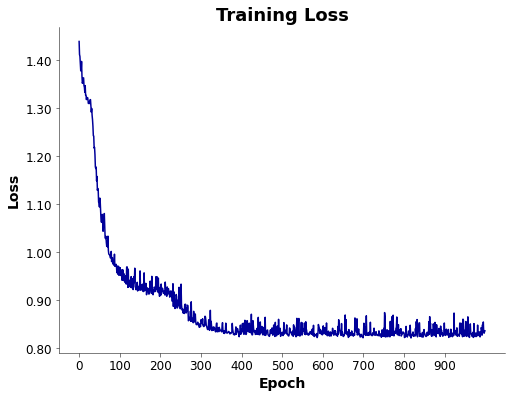

In [7]:
plot_line(loss, save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_10_noise/2023-03-14T14_19_43.498610/Sparsity of z vector.png


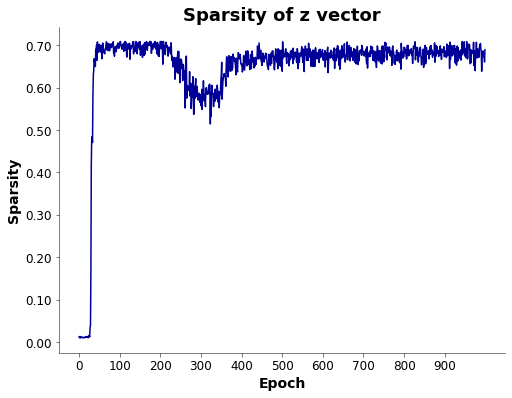

In [8]:
plot_line(sparsity, title='Sparsity of z vector', ylabel='Sparsity', save_dir=save_dir)

In [9]:
t2p.train(False)
patterns = t2p.decoder.weight[:,0].data.cpu().numpy()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
z_s = list()
alphas = list()
for i, x in enumerate(dataloader): 
    outputs = t2p(x)
    z = t2p.z.data.cpu().numpy()
    z_s.append(z[0,:,:,0,0])
    alphas.append(t2p.alpha.data.cpu().numpy()[0,:,:,0,0])

                
plot = Plot(dataset.get_input(),z_s,alphas,patterns,window_size)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_10_noise/2023-03-14T14_19_43.498610/patterns_analysis.png


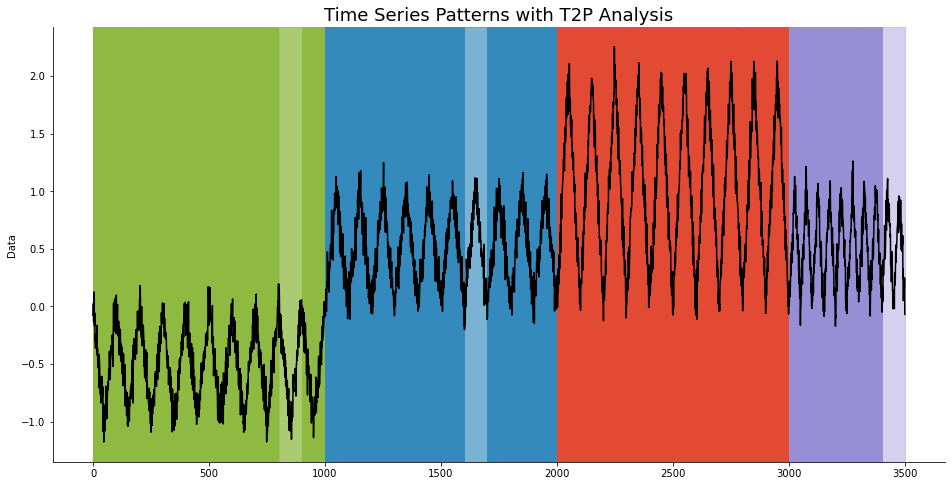

In [10]:
plot.plot_patterns_analysis(save_dir=save_dir)

Plot saved to /home/falcon/Desktop/T2P/src/experiments/synthetic_10_noise/2023-03-14T14_19_43.498610/patterns.png


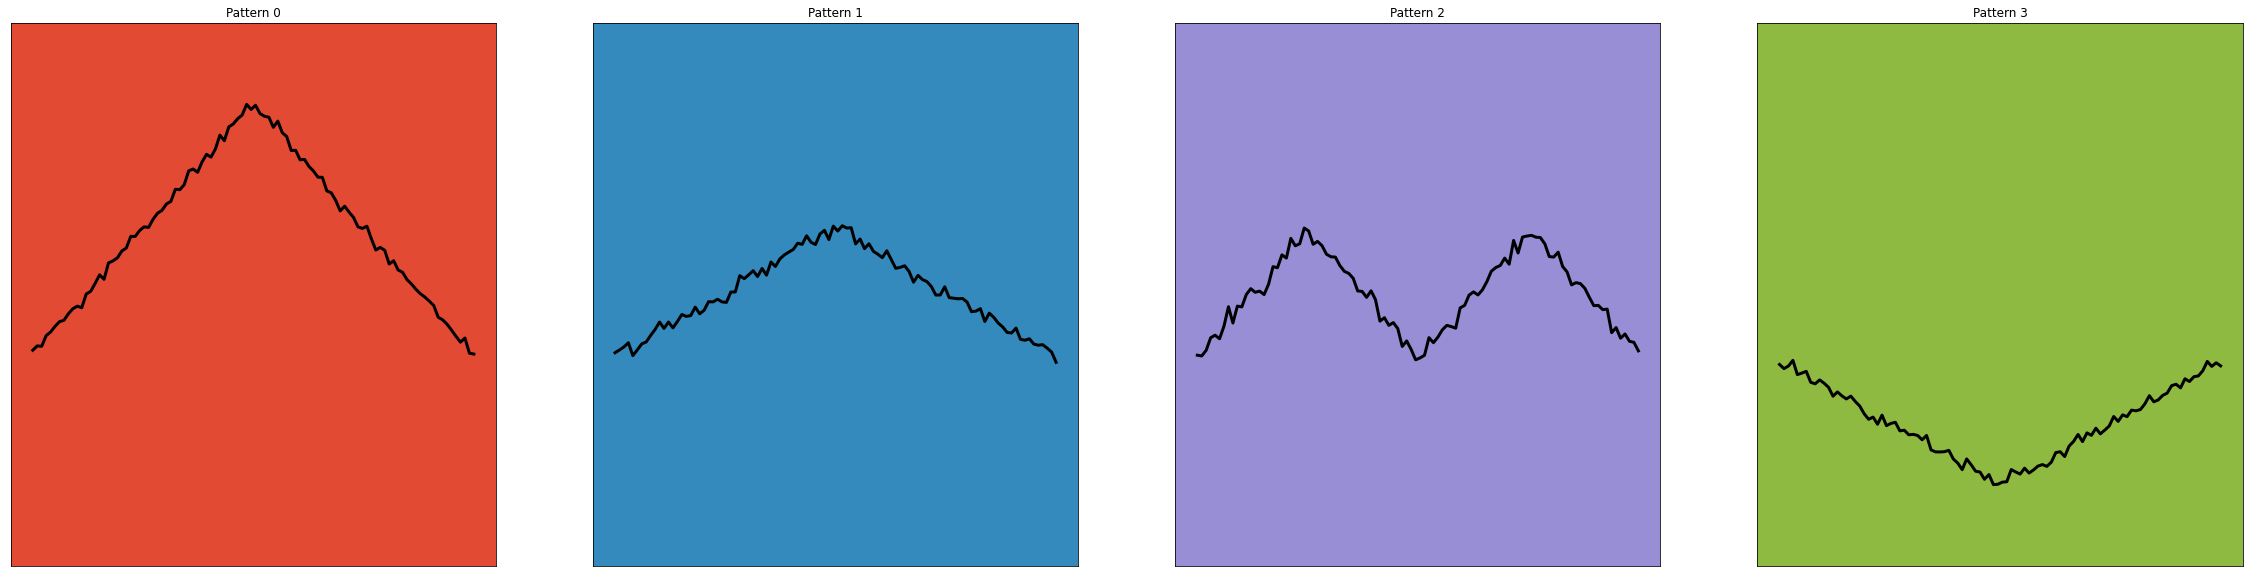

In [11]:
plot.plot_patterns(save_dir)